# Deep Hedging
## Testing the SimpleWorld_Spot_ATM world generator

Simple World with one asset and one floating ATM option.
    The asset has stochastic volatility, and a mean-reverting drift.
    The implied volatility of the asset is not the realized volatility.

In [ ]:
# """ Slighly annoying: by default the SageMaker Python import directory does not include our git directory """
# 「少し厄介なのは、デフォルトでは SageMaker の Python のインポートパスに Git ディレクトリが含まれていないことです」
# → AWS SageMaker 上では、プロジェクトの Git クローン元のコードが Python のインポートパスに自動で含まれない

import os
p = os.getcwd()  # 現在の作業ディレクトリを取得

dhn = "/deephedging/"
i = p.find(dhn)  # 作業ディレクトリ内に '/deephedging/' が含まれているか探す

if i != -1:
    p = p[:i]  # '/deephedging/' の直前までのパスを取り出す
    import sys
    sys.path.append(p)  # そのパスを Python のモジュール検索パスに追加する
    print("SageMaker: added python path %s" % p)
    # SageMaker の環境に手動でパスを追加したことを通知


In [ ]:
# 必要なライブラリをインポート
import numpy as np
from IPython.display import display, Markdown, Latex  # Jupyter 上でリッチな出力用

# deephedging パッケージからワールドジェネレーターをインポート
from deephedging.world import SimpleWorld_Spot_ATM

# 設定ファイルクラスのインポート（必要に応じて pip install）
from cdxbasics.config import Config  # pip install でインストールが必要なパッケージ

# 本番環境では不要。開発中のホットリロード用
import imp
import deephedging.world as _
imp.reload(_)  # モジュールの再読み込み（変更を即時反映）

# 「Simple Black & Scholes World」という見出しを Markdown で表示
display(Markdown("## Simple Black & Scholes World"))

# コンフィグ（設定）を作成
config = Config()
config.samples = 10000         # サンプル数：シミュレーションする価格パスの本数
config.black_scholes = True    # Black-Scholes モデルをベースにする設定を有効化
config.drift = 0.15            # ドリフト（平均的な上昇率）を 15% に設定
config.rvol = 0.22             # 実現ボラティリティ（価格変動の大きさ）を 22% に設定

# SimpleWorld_Spot_ATM インスタンスを作成
world = SimpleWorld_Spot_ATM(config)

# 資産価格のサンプルパスをプロット（10本分）
world.plot(plot_samples=10)


ModuleNotFoundError: No module named 'deephedging'

## Stochastic Vol, Drift, Option trading

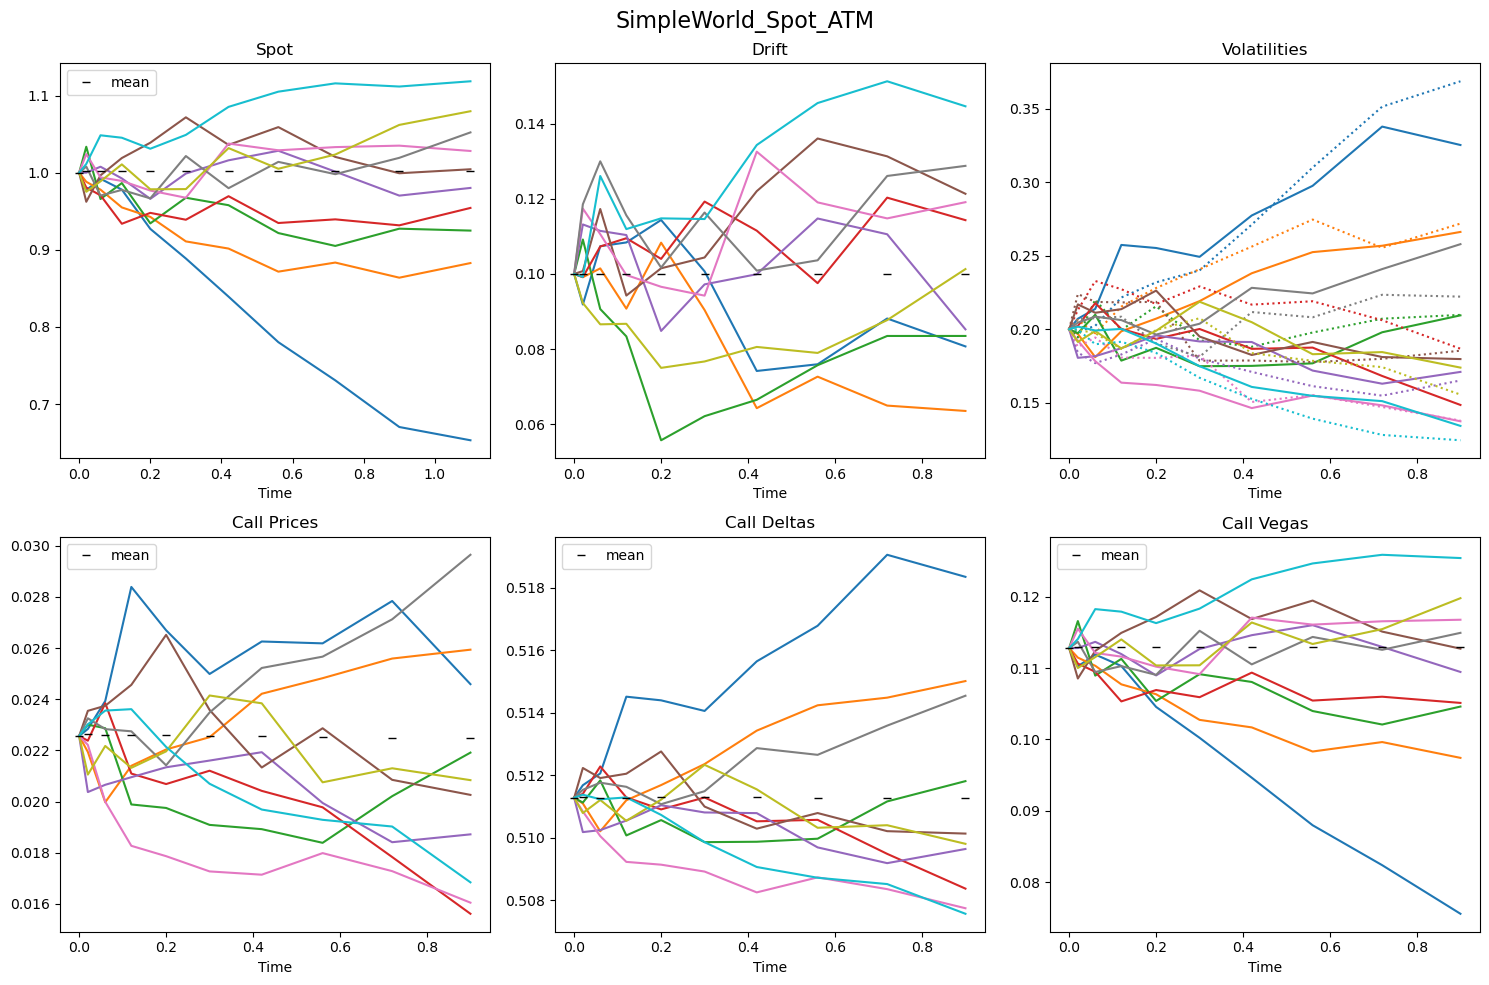

Config settings:
config['black_scholes'] = False
config['invar_steps'] = 0
config['samples'] = 10000



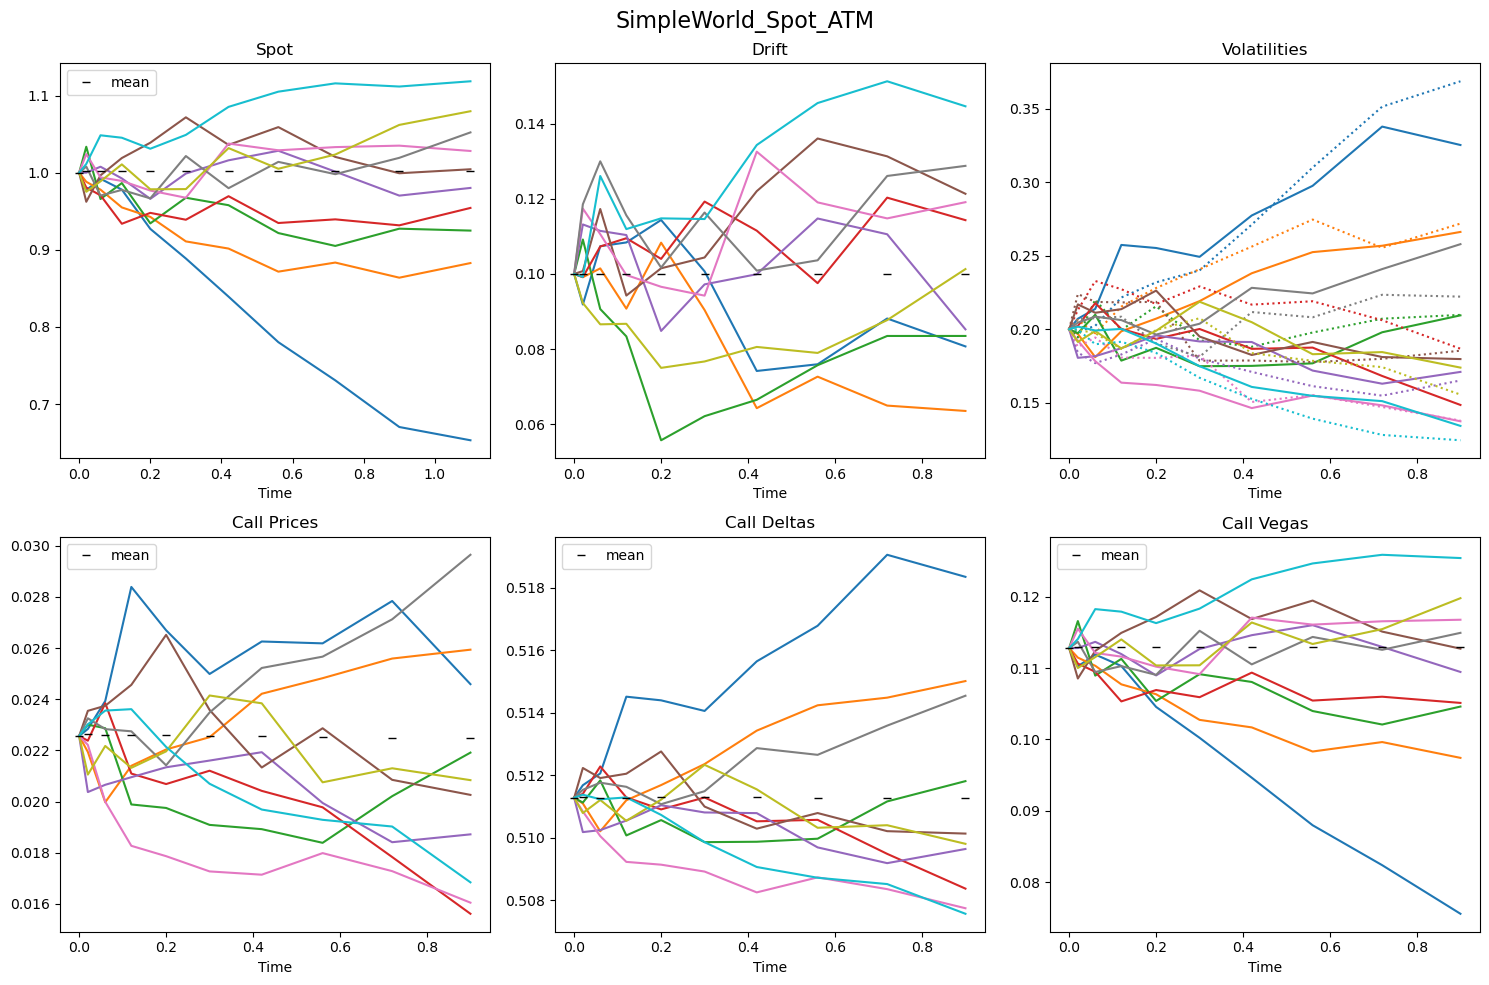

In [ ]:
# 新たに Config（設定）を作成
config = Config()

# サンプル数（生成する資産価格パスの本数）を 10000 に設定
config.samples = 10000

# Black-Scholes モデルを使用しない設定（より複雑な非定常モデルを使用）
config.black_scholes = False

# invar_steps（不変ステップ）を 0 に設定
# → この値は、各パスで「外乱（ノイズ）」が加わるまでのステップ数を意味している可能性がある
# → 0 にすることで、初期からボラティリティ等の変動が加わる（より動的な市場）

# 上記設定をもとに市場環境を生成
world = SimpleWorld_Spot_ATM(config)

# 生成された資産価格のサンプルパスを10本可視化
world.plot(plot_samples=10)

## Stochastic Vol, Drift, Option trading; in the 'invariant' distribution

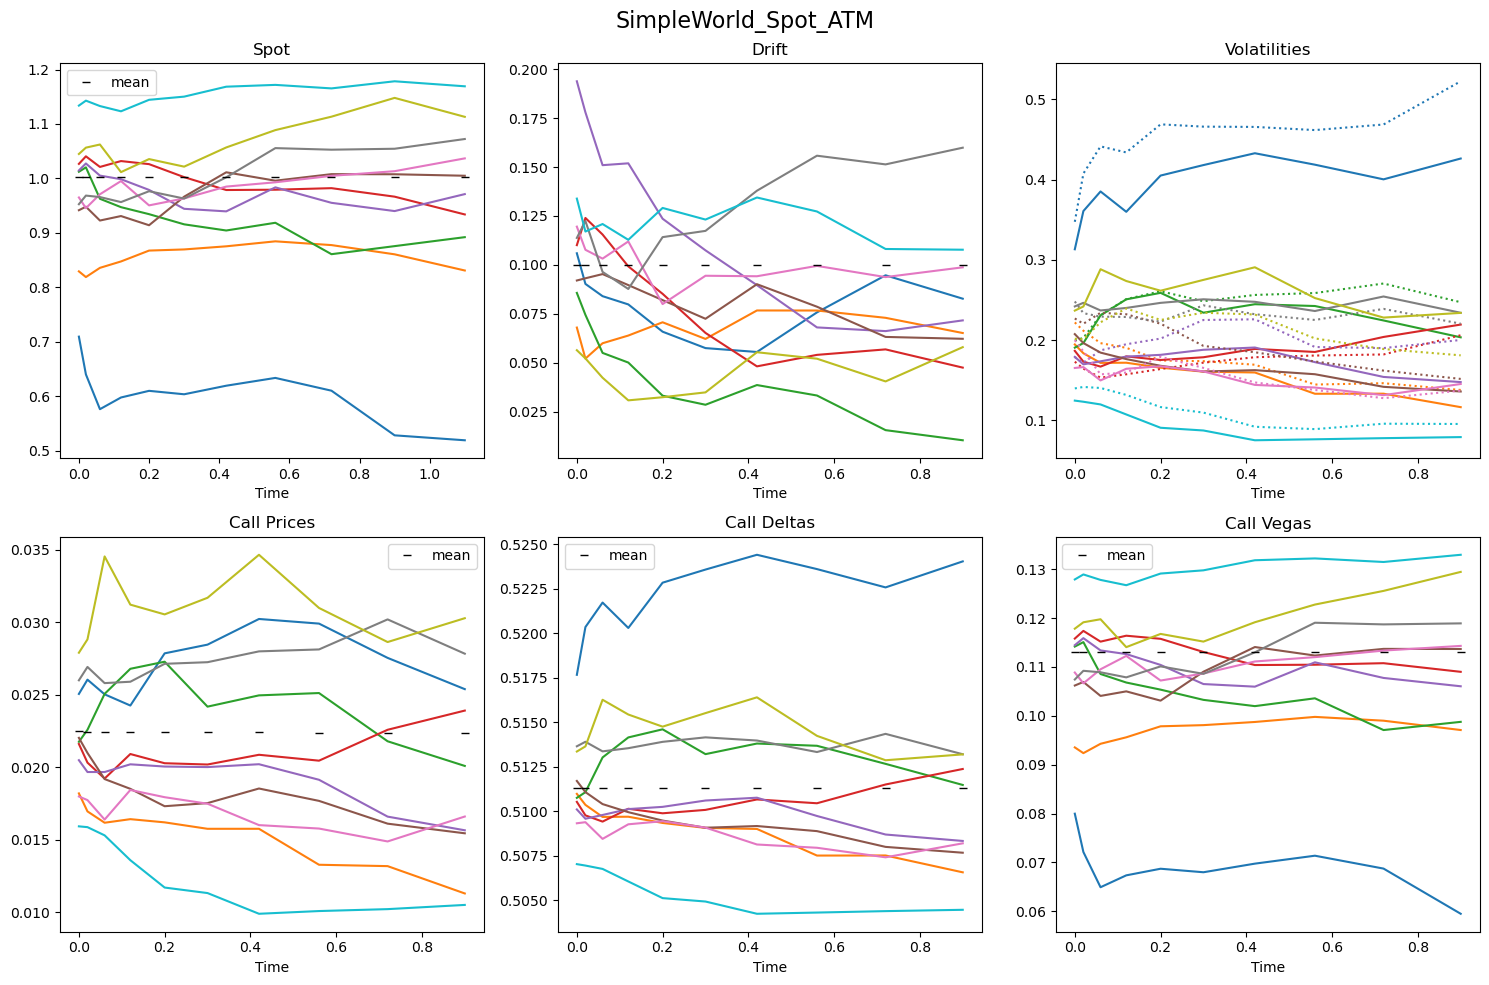

Config settings:
config['black_scholes'] = False
config['invar_steps'] = 10
config['samples'] = 10000



In [ ]:
# 新たに Config（設定）オブジェクトを作成
config = Config()

# サンプル数（生成する資産価格パスの本数）を 10000 に設定
config.samples = 10000

# Black-Scholes モデルを無効化（False）
config.black_scholes = False
# → ボラティリティやドリフトが時変・状態依存の「非定常モデル」が使用される

# 不変ステップ数（invariant steps）を 10 に設定
config.invar_steps = 10
# → 各パスの最初の10ステップでは、市場が安定（変動なし）に保たれ、その後にボラティリティなどの外乱が加わる
# → 「最初は静かだが途中から動く」ような市場環境を作れる

# 設定をもとに世界（市場環境）を構築
world = SimpleWorld_Spot_ATM(config)

# 生成された資産価格パスのうち10本をプロットして表示
world.plot(plot_samples=10)
